<a href="https://colab.research.google.com/github/keerthib55/Machine_Learning/blob/main/Opnion_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the required libraries

In [ ]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Loading the data

In [ ]:
# Loading  the data from source file

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/small_sampled_review.csv')

In [ ]:
data.head(5)

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,8/11/2005,rhSoGsnmBmjLkHTMGbkkag,F4cbJPyoF1nd3S7Rqz72vw,This is a decent bar with great martini's. The...,4,0,0,0,NR,4bezX_6rtLrH3_cI-gDmnw
1,10/16/2008,Ph9CRG7wEYnqYBWmOOvmIg,xQcBURCEGgTGEfIOuaW7pg,"4 stars for the food and service, 1 more for b...",5,1,1,0,YR,I8W5EBWP5ajd1tk8IwhRfg
2,3/10/2010,5VadqboCP90rHyuT3ubKIw,LyoBey7pYHult00lhiS02g,"Joya=Thai place with a DJ. For the Thai food, ...",4,0,0,0,YR,pSSajdYNKTyAGV8-fk7fWQ
3,12/21/2007,xFm-38ByE0wEDjfOMzztjA,0xT8uwiQLT9elHBJqzvMbQ,If you are looking for a night out with the gu...,4,1,1,0,NR,-fqGBZYWHJD0EKTwAE3tTA
4,4/26/2010,ZYAWO432niFPrb0T8HHS_A,dCATwLTGaDZAbSFxA-4pkw,I am a big fan of the Peekskill Coffee House. ...,5,3,2,0,NR,pZX0hFRgub8j8AL5-Xm9QA


### Data Preprocessing

In [ ]:
#data preprocessing
data = data.drop_duplicates()

### Review Content Processing

In [ ]:
# considering reviewcontent
data['reviewContent'] = data['reviewContent'].astype(str)

### Sentiment Analysis

In [ ]:
#opinion mining i.e performing sentiment analysis on the data
%%time
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['reviewContent'].apply(lambda x: sia.polarity_scores(x)['compound'])

CPU times: user 1min 1s, sys: 157 ms, total: 1min 2s
Wall time: 1min 8s


### Data visualization

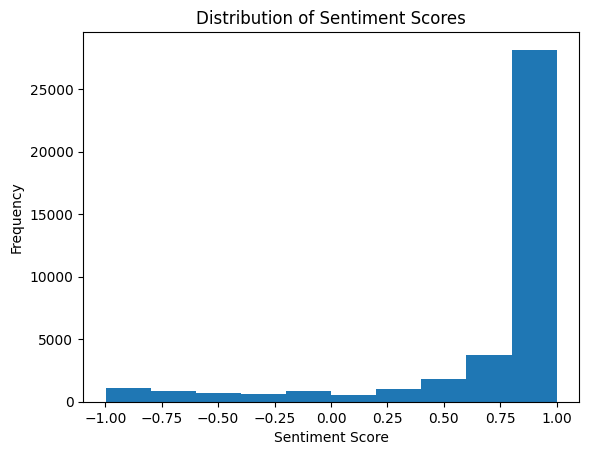

In [ ]:
# Analyze and visualize the data
# Example: Plotting the distribution of sentiment scores

plt.hist(data['sentiment_score'], bins=10)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

### Review monitoring

In [ ]:
# Implement the review monitoring system
# Example: Classifying reviews as positive, negative, or neutral based on sentiment score
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

### Exporting the processed data

In [ ]:
# Export the processed data to a new file
data.to_csv('processed_reviews_data.csv', index=False)  # Replace 'processed_reviews_data.csv' with desired output file name

In [ ]:
data.head(5)

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,sentiment_score,sentiment
0,8/11/2005,rhSoGsnmBmjLkHTMGbkkag,F4cbJPyoF1nd3S7Rqz72vw,This is a decent bar with great martini's. The...,4,0,0,0,NR,4bezX_6rtLrH3_cI-gDmnw,0.9153,Positive
1,10/16/2008,Ph9CRG7wEYnqYBWmOOvmIg,xQcBURCEGgTGEfIOuaW7pg,"4 stars for the food and service, 1 more for b...",5,1,1,0,YR,I8W5EBWP5ajd1tk8IwhRfg,0.4588,Positive
2,3/10/2010,5VadqboCP90rHyuT3ubKIw,LyoBey7pYHult00lhiS02g,"Joya=Thai place with a DJ. For the Thai food, ...",4,0,0,0,YR,pSSajdYNKTyAGV8-fk7fWQ,0.9550,Positive
3,12/21/2007,xFm-38ByE0wEDjfOMzztjA,0xT8uwiQLT9elHBJqzvMbQ,If you are looking for a night out with the gu...,4,1,1,0,NR,-fqGBZYWHJD0EKTwAE3tTA,0.8788,Positive
4,4/26/2010,ZYAWO432niFPrb0T8HHS_A,dCATwLTGaDZAbSFxA-4pkw,I am a big fan of the Peekskill Coffee House. ...,5,3,2,0,NR,pZX0hFRgub8j8AL5-Xm9QA,0.9748,Positive


In [ ]:
# Create a new column 'genuine' to indicate if the review is genuine or fake
data['genuine'] = data['flagged'].apply(lambda x: 'Genuine' if x == 'N' else 'Fake')

In [ ]:
# Print the updated dataset
data.head(10)

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,sentiment_score,sentiment,genuine
0,8/11/2005,rhSoGsnmBmjLkHTMGbkkag,F4cbJPyoF1nd3S7Rqz72vw,This is a decent bar with great martini's. The...,4,0,0,0,NR,4bezX_6rtLrH3_cI-gDmnw,0.9153,Positive,Fake
1,10/16/2008,Ph9CRG7wEYnqYBWmOOvmIg,xQcBURCEGgTGEfIOuaW7pg,"4 stars for the food and service, 1 more for b...",5,1,1,0,YR,I8W5EBWP5ajd1tk8IwhRfg,0.4588,Positive,Fake
2,3/10/2010,5VadqboCP90rHyuT3ubKIw,LyoBey7pYHult00lhiS02g,"Joya=Thai place with a DJ. For the Thai food, ...",4,0,0,0,YR,pSSajdYNKTyAGV8-fk7fWQ,0.9550,Positive,Fake
3,12/21/2007,xFm-38ByE0wEDjfOMzztjA,0xT8uwiQLT9elHBJqzvMbQ,If you are looking for a night out with the gu...,4,1,1,0,NR,-fqGBZYWHJD0EKTwAE3tTA,0.8788,Positive,Fake
4,4/26/2010,ZYAWO432niFPrb0T8HHS_A,dCATwLTGaDZAbSFxA-4pkw,I am a big fan of the Peekskill Coffee House. ...,5,3,2,0,NR,pZX0hFRgub8j8AL5-Xm9QA,0.9748,Positive,Fake
5,6/13/2011,KbS8D2xNwPjO59DOdlbJfQ,YIfyAyspooUkUrOAr1Qptw,My husband I went here Friday evening last wee...,4,0,0,0,N,rnjz2KNgsQ2YaC_kjeuuAQ,0.9786,Positive,Genuine
6,12/14/2006,wA5WLYvThEsZc1Te_4Lcbw,sZxXpvmBUN2fSCtK_BZFoQ,Ok so the place looks like a total dump on the...,4,2,2,0,YR,iXuCIziS010a65NGGIiEhw,0.9886,Positive,Fake
7,5/11/2010,uyCe6qfQAj0gDCkv8m4Vqg,_cUtxCvCccwgNJzD5I0cDA,The Whistler is the Hipster Violet Hour! The n...,3,10,10,6,NR,0pz5xXB-4f0WlLD33Y6jKw,0.9390,Positive,Fake
8,8/12/2008,A_FC9yQNxfApDf0sxBGl8g,-w5elUJcuHukI5pHri3_vw,Meh is the exact word I would use for this pla...,2,1,1,1,NR,eNTpEbysiG3KiEHfGnc13A,0.5719,Positive,Fake
9,11/19/2011,ECfIy1BPNxOOoShMptEAOQ,yFEMZOTprQgblKnwpBZH4w,Really disappointed with the food. Momo was th...,2,1,0,0,YR,X7yGrz7oDbt8UY5rdmJc_w,-0.6801,Negative,Fake


In [ ]:
# Print only the rows with fake reviews
fake_reviews = data[data['genuine'] == 'Fake']
fake_reviews.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,sentiment_score,sentiment,genuine
0,8/11/2005,rhSoGsnmBmjLkHTMGbkkag,F4cbJPyoF1nd3S7Rqz72vw,This is a decent bar with great martini's. The...,4,0,0,0,NR,4bezX_6rtLrH3_cI-gDmnw,0.9153,Positive,Fake
1,10/16/2008,Ph9CRG7wEYnqYBWmOOvmIg,xQcBURCEGgTGEfIOuaW7pg,"4 stars for the food and service, 1 more for b...",5,1,1,0,YR,I8W5EBWP5ajd1tk8IwhRfg,0.4588,Positive,Fake
2,3/10/2010,5VadqboCP90rHyuT3ubKIw,LyoBey7pYHult00lhiS02g,"Joya=Thai place with a DJ. For the Thai food, ...",4,0,0,0,YR,pSSajdYNKTyAGV8-fk7fWQ,0.9550,Positive,Fake
3,12/21/2007,xFm-38ByE0wEDjfOMzztjA,0xT8uwiQLT9elHBJqzvMbQ,If you are looking for a night out with the gu...,4,1,1,0,NR,-fqGBZYWHJD0EKTwAE3tTA,0.8788,Positive,Fake
4,4/26/2010,ZYAWO432niFPrb0T8HHS_A,dCATwLTGaDZAbSFxA-4pkw,I am a big fan of the Peekskill Coffee House. ...,5,3,2,0,NR,pZX0hFRgub8j8AL5-Xm9QA,0.9748,Positive,Fake


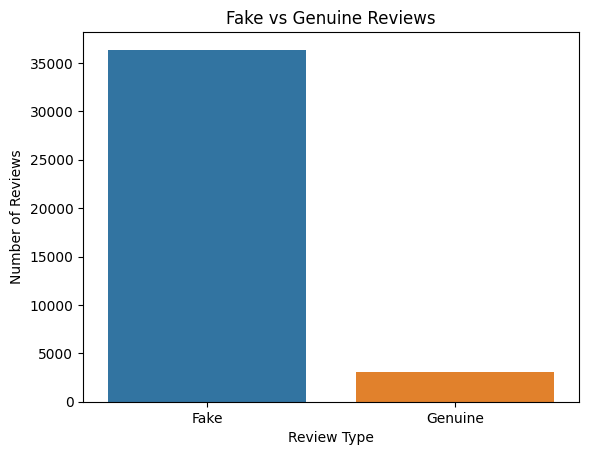

In [ ]:
# Count the number of fake and genuine reviews
review_counts = data['genuine'].value_counts()

# Create the comparison plot
sns.barplot(x=review_counts.index, y=review_counts.values)
plt.title('Fake vs Genuine Reviews')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Calculate the percentages of fake and genuine reviews
fake_percentage = (data['genuine'].value_counts()['Fake'] / len(data)) * 100
genuine_percentage = (data['genuine'].value_counts()['Genuine'] / len(data)) * 100

# Print the percentages
print("Percentage of Fake Reviews: {:.2f}%".format(fake_percentage))
print("Percentage of Genuine Reviews: {:.2f}%".format(genuine_percentage))


Percentage of Fake Reviews: 92.23%
Percentage of Genuine Reviews: 7.77%
